In [1]:
import re
import pandas as pd 
import numpy as np 
import random 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf 

In [2]:
df = pd.read_csv("src/data/newsdatasetshuffle_4000.csv")
raw_data = df.iloc[:,3:].drop('timestamp', axis=1)
raw_data.head()

,title,label
0,"Stok Gula Aman, Pabrik Makanan Siap Ngebut Lagi",industri
1,"Secuplik Nestapa Ethiopia, Negara Miskin yang ...",perang
2,Ssstt!! Ini Rahasia Tajir Jual-Beli Properti,properti
3,Menteri Era SBY Yakin Nadiem Makarim Majukan P...,teknologi
4,"Dewan Kolonel Vs Dewan Kopral, Perang Dukungan...",perang


In [3]:
raw_data = raw_data.astype(str)

In [4]:
def text_preprocessing(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
  text = text.strip()                               # Menghapus whitespaces
  return text

%time
raw_data['title'] = raw_data['title'].apply(text_preprocessing)

Wall time: 0 ns


In [5]:
raw_data.head()

,title,label
0,stok gula aman pabrik makanan siap ngebut lagi,industri
1,secuplik nestapa ethiopia negara miskin yang t...,perang
2,ssstt ini rahasia tajir jualbeli properti,properti
3,menteri era sby yakin nadiem makarim majukan p...,teknologi
4,dewan kolonel vs dewan kopral perang dukungan ...,perang


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
raw_data['label'] = le.fit_transform(raw_data['label'])
raw_data.head()

,title,label
0,stok gula aman pabrik makanan siap ngebut lagi,0
1,secuplik nestapa ethiopia negara miskin yang t...,2
2,ssstt ini rahasia tajir jualbeli properti,3
3,menteri era sby yakin nadiem makarim majukan p...,4
4,dewan kolonel vs dewan kopral perang dukungan ...,2


In [7]:
le.classes_

array(['industri', 'pemerintahan', 'perang', 'properti', 'teknologi'],
      dtype=object)

In [8]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')
len(stopwords_ind)

758

In [9]:
def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
      if word not in stopwords_ind:
          clean_words.append(word)
  return " ".join(clean_words)

In [10]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

In [11]:
def text_preprocessing_process(text):
    text = remove_stop_words(text)
    text = stemming(text)
    return text

In [12]:
raw_data['title']=raw_data['title'].apply(text_preprocessing_process)
raw_data

,title,label
0,stok gula aman pabrik makan ngebut,0
1,cuplik nestapa ethiopia negara miskin jebak pe...,2
2,ssstt rahasia tajir jualbeli properti,3
3,menteri era sby nadiem makarim maju didik ri,4
4,dewan kolonel vs dewan kopral perang dukung pu...,2
...,...,...
3995,mudah tanam modal ikn perintah siap rancang at...,1
3996,warning imf pangkas proyeksi ekonomi dunia,3
3997,cekam pasu kurdi kontak senjata lawan isis suriah,2
3998,fakta tarik wajib militer korea selatan,1


In [13]:
raw_data.isnull().sum()

title    0
label    0
dtype: int64

In [14]:
raw_data['label'].value_counts()

0    800
2    800
3    800
4    800
1    800
Name: label, dtype: int64

In [15]:
X = raw_data['title']
y = raw_data['label']

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Unigram
vec_TF_IDF = TfidfVectorizer(ngram_range=(1,1))
vec_TF_IDF.fit(X)

x_tf_idf = vec_TF_IDF.transform(X)

In [17]:
len(vec_TF_IDF.vocabulary_)

5083

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_tf_idf,y, test_size=0.15)
# X_val,y_val, X_test,y_test = train_test_split(X_test,y_test, test_size=0.5)

X_train.shape, X_test.shape, y_train.shape,y_test

((3400, 5083),
 (600, 5083),
 (3400,),
 1309    1
 1104    3
 55      2
 1369    4
 1505    1
        ..
 1956    1
 2345    4
 3501    1
 1542    2
 1404    3
 Name: label, Length: 600, dtype: int32)

In [19]:
import xgboost
xgboost.XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [20]:
# from sklearn.model_selection import GridSearchCV
# def hyperParameterTuning(X_train, y_train):
#     param_tuning = {
#         'learning_rate': [0.01, 0.1],
#         'max_depth': [3, 5, 7, 10],
#         'min_child_weight': [1, 3, 5],
#         'subsample': [0.5, 0.7],
#         'colsample_bytree': [0.5, 0.7],
#         'n_estimators' : [100, 200, 500],
#         'objective': ['reg:squarederror']
#     }

#     xgb_model = xgboost.XGBClassifier()

#     gsearch = GridSearchCV(estimator = xgb_model,
#                            param_grid = param_tuning,                        
#                            #scoring = 'neg_mean_absolute_error', #MAE
#                            #scoring = 'neg_mean_squared_error',  #MSE
#                            cv = 5,
#                            n_jobs = -1,
#                            verbose = 1)

#     gsearch.fit(X_train,y_train)

#     return gsearch.best_params_

# hyperParameterTuning(X_train,y_train)

In [21]:
from tabnanny import verbose


xgb_model = xgboost.XGBClassifier(colsample_bytree = 0.5,
                                  learning_rate =0.01,
                                  max_depth=10,
                                  min_child_weight= 1,
                                  n_estimators= 500,
                                  objective= 'reg:squarederror',
                                  subsample= 0.5,
                                  eval_metric = 'auc',
                                  verbose=True)

In [22]:
model = xgb_model.fit(X_train,y_train)

[00:57:24] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [23]:
y_predict = model.predict(X_test)

In [30]:
y_test

1309    1
1104    3
55      2
1369    4
1505    1
       ..
1956    1
2345    4
3501    1
1542    2
1404    3
Name: label, Length: 600, dtype: int32

In [29]:
y_predict

array([1, 3, 2, 4, 2, 4, 3, 3, 3, 4, 2, 1, 2, 1, 0, 0, 2, 3, 3, 1, 0, 4,
       0, 2, 0, 4, 2, 3, 1, 3, 4, 2, 4, 4, 2, 1, 4, 4, 1, 3, 4, 4, 3, 2,
       4, 2, 1, 1, 2, 4, 4, 1, 2, 4, 1, 3, 0, 4, 0, 4, 0, 4, 1, 4, 3, 4,
       3, 2, 2, 2, 2, 3, 2, 4, 1, 2, 3, 1, 2, 3, 1, 2, 1, 2, 3, 3, 3, 4,
       1, 2, 3, 4, 1, 1, 4, 2, 4, 4, 1, 3, 0, 4, 0, 3, 0, 4, 2, 2, 4, 2,
       2, 3, 4, 4, 3, 1, 4, 3, 3, 1, 2, 4, 0, 3, 2, 4, 4, 3, 0, 3, 4, 1,
       3, 3, 3, 4, 1, 4, 2, 1, 1, 4, 2, 1, 1, 0, 4, 1, 2, 1, 3, 3, 2, 4,
       0, 1, 4, 1, 4, 3, 3, 0, 3, 4, 0, 0, 1, 1, 2, 2, 2, 2, 4, 2, 1, 2,
       4, 2, 1, 1, 4, 1, 4, 2, 1, 3, 3, 1, 4, 0, 1, 2, 0, 3, 0, 4, 3, 0,
       2, 1, 4, 1, 4, 4, 4, 4, 2, 0, 3, 4, 3, 2, 0, 4, 3, 0, 4, 2, 4, 1,
       3, 1, 4, 0, 2, 4, 4, 3, 3, 2, 2, 1, 3, 2, 0, 3, 3, 4, 4, 1, 4, 4,
       4, 4, 0, 1, 3, 3, 2, 3, 0, 3, 3, 4, 1, 0, 3, 4, 0, 4, 4, 0, 0, 4,
       0, 2, 3, 3, 0, 1, 0, 0, 4, 4, 1, 3, 1, 4, 1, 0, 2, 2, 2, 4, 4, 1,
       4, 0, 0, 1, 1, 0, 2, 3, 3, 0, 4, 1, 0, 2, 1,

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [25]:
print(classification_report(y_test,y_predict,target_names=le.classes_))

              precision    recall  f1-score   support

    industri       0.77      0.60      0.68       120
pemerintahan       0.76      0.69      0.73       113
      perang       0.76      0.80      0.78       112
    properti       0.87      0.85      0.86       131
   teknologi       0.63      0.81      0.71       124

    accuracy                           0.75       600
   macro avg       0.76      0.75      0.75       600
weighted avg       0.76      0.75      0.75       600



[Text(0, 0.5, 'industri'),
 Text(0, 1.5, 'pemerintahan'),
 Text(0, 2.5, 'perang'),
 Text(0, 3.5, 'properti'),
 Text(0, 4.5, 'teknologi')]

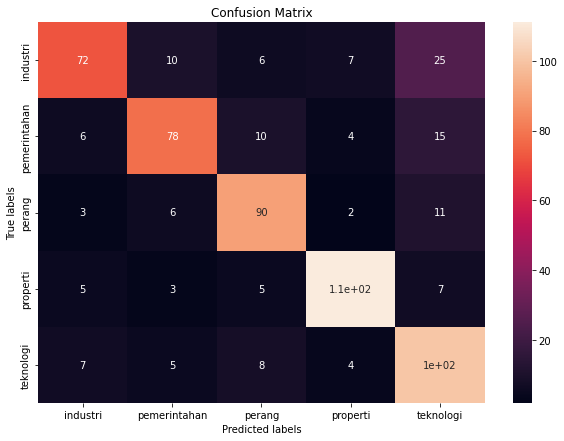

In [26]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(le.classes_)
ax.yaxis.set_ticklabels(le.classes_)

In [28]:
model.save_model('model/xgboost-model.json')